### **STEP ONE** OF DATA PROCESSING PIPELINE

##### This script imports data in which a Reliable Component Analysis was performed. Pre/Post Stimulus was dual frequency tagged: 2F1 = 6 Hz, 2F2 = 7.5 Hz (inverting stim). Each participant completed 2 sessions. For each session, a xF1 and xF2 bandpass filter was performed. So 1 single participant has 4 data files. This is for a frequency-based analysis of the LTP paradigm

In [1]:
# load packages
import numpy as np 
import scipy.io
from scipy.io   import  loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt #import matplotlib as plt
from scipy.optimize import curve_fit 
import seaborn as sns #import mat73
import pickle as pkl
from datetime import datetime
from itertools import chain

### Set Dynamic Params

In [2]:
rca_comp = 0 # rca component to look at 
harmo = 0 # harmonic to look at 0-3 : 2, 4,6,8

### Set Dir Path(s): MainDir, SaveDataDir

In [3]:
# Main Directory of processed file from MatLab
MainDir = 'C:\\plimon\\LTP_analysis\\RCA_Fx_OutputData\\RCA_Files\\' # set dir - on my computer
os.chdir(MainDir) # change old dir, to this dir
d = os.listdir(MainDir) # list files in dir
print(f'Avilable Files to choose from: {len(d)}')
print(f'Files on hand: {d}')
##############################################
FileN_f1 = d[2] # choose one
FileN_f2  = d[4]                         
file_path1 = os.path.join(MainDir, FileN_f1) # join paths and prep 2 load
print('Current WD:',file_path1) # does path exist ... ?
print('Does File #1 Exist?',os.path.exists(file_path1)) # yes or no

file_path2 = os.path.join(MainDir, FileN_f2) # join paths and prep 2 load
print('Current WD:',file_path2) # does path exist ... ?
print('Does File #2 Exist?',os.path.exists(file_path1)) # yes or no

Avilable Files to choose from: 5
Files on hand: ['desktop.ini', 'OfficialF1_Control_rcaResults_Sweep.mat', 'OfficialF1_rcaResults_Sweep_F2F4F6F8.mat', 'OfficialF2_Control_rcaResults_Sweep.mat', 'OfficialF2_rcaResults_Sweep_F2F4F6F8.mat']
Current WD: C:\plimon\LTP_analysis\RCA_Fx_OutputData\RCA_Files\OfficialF1_rcaResults_Sweep_F2F4F6F8.mat
Does File #1 Exist? True
Current WD: C:\plimon\LTP_analysis\RCA_Fx_OutputData\RCA_Files\OfficialF2_rcaResults_Sweep_F2F4F6F8.mat
Does File #2 Exist? True


In [4]:
# # Save Data Dir ...
# #SaveDataDir = 'D:\\AttnXV3_analysis\\RCA_F1\\AllSubjSweepRCA\\' # set dir where files (.pkl, .csv) will be saved
# SaveDataDir = 'C:\\plimon\\LTP_analysis\\RCA_F1\\' # set dir where files (.pkl, .csv) will be saved
# FileOutName = 'AllSessionDataCombin_allHarms' 
# newPath = os.path.join(SaveDataDir, FileOutName)
# if not os.path.exists(SaveDataDir):
#     os.makedirs(SaveDataDir)
# print(f'Path to save data:{SaveDataDir}')
# ######################################################
# dnt = datetime.now() # add date and time bc im wreckless when saving ..
# fdnt = dnt.strftime("%Y%m%d_%H%M%S") # set the above as a string ...
# FileN = f'{FileOutName}_{fdnt}.pkl' 
# #FileNToMatlab = f'{FileOutName}_{fdnt}.h5' 
# #FileN = f'{FileOutName}_{fdnt}.csv' 
# NewFileNPath = os.path.join(SaveDataDir,FileN)
# print('Full New File Dir: ', NewFileNPath)

### load all data per file

In [5]:
df_f1 = scipy.io.loadmat(file_path1)
df_f2 = scipy.io.loadmat(file_path2)

#### Load F1 and F2 RCA Data

In [6]:
rca_f1 = df_f1['rcaResult']['projectedData'][0,0]
f1 = [rca_f1[x,0] for x in range(rca_f1.shape[0])] # entry per subject

In [7]:
rca_f2 = df_f2['rcaResult']['projectedData'][0,0]
f2 = [rca_f2[x,0] for x in range(rca_f2.shape[0])]

In [8]:
# load subject names ...
SubNames = df_f1['rcaResult'][0,0][5]
FileName = [x[0][3:] for subjlist in SubNames for x in subjlist[0][2][0]]
print(f'Total Data Files: {len(FileName)}')

Total Data Files: 66


In [9]:
str_split = '-'  # strong to index sub name and expt cond.
labels = ['Potentiated Stim, Attention Congruent','Non-Potentiated Stim, Attention Congruent','Potentiated Stim, Attention Incongruent ','Non-Potentiated Stim, Attention Incongruent']
#labels = ['A-I C','A-I Control','~A-I','A-I INC']
contrast_labs = ['1%','3%','5%','16%','40%','100%']
# custom colors
colors = ["#FF0B04", "#4374B3", "#228B22", "#8A2BE2"]
# Set color palette
sns.set_palette(sns.color_palette(colors))

#### Make Subj Session Name Format Uniform and extract sub ID 

In [10]:
# set all file names to the same hyphen format
FileName = [FileName.replace('_','-') for FileName in FileName]
NumFiles = int(len(FileName))
# Find How Many Subject Names There are ...
string_ind = '-'
uniqueSubs = []
SessFileType = []
'for each file name, get sub ID and also session record'
for n in range(NumFiles):
    x = FileName[n] # single file name string ie: 'nl-xxxx_attnX'
    if string_ind in x:
        y = x.split(string_ind)[0] # get subj number
        #print(y)
        z = x.split(string_ind)[1] # get session condition name 
        #print(z)
        # from each session name extract import info that will help us index and exclude later on ..
        uniqueSubs.append(y) # store all participant numbers (repeating - will be sorted later)
        SessFileType.append(z) # store the condtion label

In [11]:
print(f'Subject IDs: {uniqueSubs}')
print(f' Conditions: {SessFileType[0:2]}')

Subject IDs: ['2651', '2651', '2652', '2652', '2653', '2653', '2654', '2654', '2655', '2655', '2657', '2657', '2658', '2658', '2659', '2659', '2660', '2661', '2661', '2663', '2663', '2664', '2664', '2665', '2665', '2666', '2666', '2667', '2667', '2668', '2668', '2669', '2669', '2670', '2670', '2671', '2671', '2672', '2672', '2674', '2674', '2676', '2677', '2677', '2678', '2695', '2695', '2696', '2696', '2697', '2697', '2708', '2715', '2716', '2726', '2727', '2728', '2728', '2733', '2734', '345202', '345202', '345215', '345215', '345216', '345216']
 Conditions: ['attnL', 'attnR']


In [12]:
# given double sessions.., how many unique participants do we have?
TotalFiles = np.array(uniqueSubs)
[NumSubs, SessCounts] = np.unique(TotalFiles, return_counts = True) # returns unique subject and how many sessions they did (should be 2)
print(f'Total Participants: {len(NumSubs)}')
[FileQuants, TotSess] = np.unique(SessCounts, return_counts = True) # returns counts of how many subs did 1 session and 2 sessions 

Total Participants: 38


In [13]:
TwoSess = SessCounts == 2 # index of who completed 2 sessions ..
GoodSubjs = NumSubs[TwoSess] # subs who completed 2 sessions 
SingleSessSubjs = NumSubs[~TwoSess] # subs who did not complete 2 sessions 

#### Have to add this step because I ran someone for attnR **twice** ... yikes ...

In [14]:
# makes sure paticipants did complete attnL and attnR
FNameCrit = ['attnL', 'attnR'] # session names 
CleanSubjs = []

for i in range(len(GoodSubjs)):
    subj = GoodSubjs[i]
    f_list = [x for x in FileName if subj in x] # import all strongs were sub number is 
    list_check  = np.sort(f_list) # abc order strings -  attnL and THEN attnR
    #print(list_check)
    print(list_check)
    counter = 0
    for n in range(len(FNameCrit)):
        if FNameCrit[n] in list_check[n]: # expt label should match file name in same position
            counter = counter + 1 # if so add 1 
            if (n == 1) and (counter == 2): # if both files strings are different, append
                CleanSubjs.append(GoodSubjs[i])
        else: # if not, add em to the singletons ... 
            print(f'{GoodSubjs[i]} did not match file name for {FNameCrit[n]}, moving subj to proper file ind array')
            str_nm = (np.array([GoodSubjs[i]], dtype=object))
            SingleSubs = np.concatenate((str_nm, SingleSessSubjs))

['2651-attnL-20231003-1500' '2651-attnR-20231006-0933']
['2652-attnL-20231003-1635' '2652-attnR-20231011-1328']
['2653-attnL-20231009-1015' '2653-attnR-20231013-0932']
['2654-attnL-20231009-1131' '2654-attnR-20231016-1152']
['2655-attnL-20231009-1303' '2655-attnR-20231016-0948']
['2657-attnL-20231013-1508' '2657-attnR-20231020-1201']
['2658-attnL-20231013-1639' '2658-attnR-20231020-1052']
['2659-attnL-20231017-0940' '2659-attnR-20231018-1523']
['2661-attnL-20231018-1322' '2661-attnR-20231017-1358']
['2663-attnR-20231019-1018' '2663-attnR2-20231030-1659']
2663 did not match file name for attnL, moving subj to proper file ind array
['2664-attnL-20231020-1452' '2664-attnR-20231019-1145']
['2665-attnL-20231024-1329' '2665-attnR-20231019-1512']
['2666-attnL-20231023-1612' '2666-attnR-20231019-1643']
['2667-attnL-20231025-1522' '2667-attnR-20231023-0947']
['2668-attnL-20231027-1251' '2668-attnR-20231023-1058']
['2669-attnL-20231024-1432' '2669-attnR-20231023-1241']
['2670-attnL-20231201-1521

### If there is a specific group of subjects to look at, here is where subj ID's can be grouped

In [44]:
#dataSet_Inds = ['2651','2658','2659','2661','2664','2666','2668','2672','2674','2695','345202','345215','2715','2726']
ds_set = np.concatenate((CleanSubjs,SingleSubs))
print(len(ds_set))
#dubSubs = ['2652']
badSubs = ['2661','2669','2671','2716','2663','2652'] # reasonable exclusions...
#badSubs = ['2652','2663','2655','2657','2661','2668','2669','2671','2696','2660','2678','2627'] # most conservative ec : activity across all conditions decreased and/or very noisy crf's 
#badSubs = ['3999']
filter_noisySubs = [x for x in ds_set if x not in badSubs ]
dataSet_Inds = filter_noisySubs
print(len(dataSet_Inds))

38
32


In [30]:
# total number of file sessions!
sCount = [x for x in uniqueSubs if x not in badSubs]
print(len(sCount))

46


#### How many participants **actually** completed both sessions:

In [31]:
print(f'{len(CleanSubjs)} Participants Completed AttnL and AttnR')
print(f'{len(SingleSubs)} Participants did not complete both sessions')

27 Participants Completed AttnL and AttnR
11 Participants did not complete both sessions


### Plot CRF for set harmonic index, per rca component selected

In [32]:
'init dicts to save data'
ProcessedConditionData = {} # pcd processed condition data
diffs = {} # post - pre  / post + pre data
ProcessedComplexVals = {}
####################################################
'make empty df for missing values to still get plots'
emptyMat = np.zeros((48,4,78))
emptyMat[:] = np.nan
NumTrialsRmv = 5
###################################################
for sIn in range(len(dataSet_Inds)):
    'initialize subkeys for data'
    ProcessedConditionData[sIn] = {} # pcd processed condition data
    diffs[sIn] = {} # post - pre  / post + pre data
    ProcessedComplexVals[sIn] = {} # init dict to store real and imaginary values for data

    'enter subj ID to find file locations'
    All_Data_sIn = dataSet_Inds[sIn]
    print(f'importing subject {All_Data_sIn}s data')
    SubjFile_Pos = [(i, x) for i, x in enumerate(FileName) if All_Data_sIn in x]

    'this section deals with incomplete data by providing and creating matrix of nans'
    if (len(SubjFile_Pos)) == 1: # if only 1 file is found
        print(f'only 1 file found')

        'locate file position only - contains file name too'
        fx_fileInds = np.array([SubjFile_Pos[0][0]]) # FILE POSITION
        SessionCond = SubjFile_Pos[0][1] # FILE NAME
   
        'determine what data is missing (attnL/R) and place data in correct format'
        Expt = SessionCond.split(str_split)[1] # attnL or attnR
        if Expt == 'attnL':
            #'import first data positions and set latter conditions as missing attnR data'
            print(f'AttnL File Pos: {fx_fileInds}, Exp Session: {SessionCond}')
            # set data set to plot w filler data
            DuoSessionData = [f1[fx_fileInds[0]], f2[fx_fileInds[0]],emptyMat,emptyMat]

        elif Expt == 'attnR':
            #'import first data poitions as missing attnL data and import last data positions as missing data'
            print(f'AttnR File Pos: {fx_fileInds}, Exp Session: {SessionCond}')
            # set data set to plot w filler data
            DuoSessionData = [emptyMat,emptyMat,f1[fx_fileInds[0]], f2[fx_fileInds[0]]]

    else: #  'If subject completed both data files, divvy data'
        print(f'2 files found')
        fx_fileInds = np.array([SubjFile_Pos[0][0],SubjFile_Pos[1][0]])
        print(f'File Pos: {fx_fileInds}')
        'This dict contains Attention-Induction Congruent F1 and F2 data and Atention-Induction Incongruent F1,F2 data Unprocessed'
        DuoSessionData = [f1[fx_fileInds[0]], f2[fx_fileInds[0]],f1[fx_fileInds[1]], f2[fx_fileInds[1]]]

    'iterate thorugh all conditions, see *labels* above'
    for datamat in range(4): 

        x = np.array(DuoSessionData[datamat])
        # look at first RCA component
        xf = x[:,rca_comp,:] # [48 x 78] 1f1 2f1 4f1 6f1

        cols,rows = xf.shape # get dims of data  
        col_index = int(cols/2) # real and imaginary values to divide
        row_index = int(rows/2) # pre post boundries to divide 
        ComplexData = np.zeros((2,col_index,rows)) #real/imag x contrast/harmonic vals x trials

        realData= xf[0:col_index,:] # real values for all trials 
        phaseData = xf[col_index:,:] # imaginary values for all trials

        'store data in a more organized array (reshape)'
        ComplexData[0,:,:] = realData
        ComplexData[1,:,:] = phaseData
        # get all harmonic data in a single dict
        harmonicData = {}
        'harmonic epochs indicies'
        HamronicIndicies = np.arange(0,col_index,6) # index to get 
        'index data to prep for further processing'
        for j in range(4):
            s = HamronicIndicies[j]
            e = s+6
            harmonicData[j] = ComplexData[:,s:e,:]  #[2 x 6 x ~80 ]

        'pre allocate for crf and complex values'   
        #complexValues = {} # no combination of real x imaginary
        #CleanCRF = {} # contrast response functions
        'pre post differnces per harmonic'
        pp_diff = np.zeros((4,6)) 

        'import harmonic data per datamatrix in data set as pre post'
        for l in range(4):
            cplxValsRec = np.zeros((2,2,6)) # pre/postx real/imaginary values x per contrast sweep incriment
            crfValsRec = np.zeros((2,6))

            'import data per harmonic'
            hd = harmonicData[l] # 2 x 6 x numtrials
            'split pre/post'
            p1 = hd[:,:,NumTrialsRmv:row_index] # pre  [2x6xnumtrials]
            p2 = hd[:,:,row_index+NumTrialsRmv:] # post 
            'store pre post in temp set array'
            px_set = [p1,p2] # store pre post in temp array

            for pp in range(2):
                dIn = px_set[pp] # import pre or post data [2x6,~39]
                for sweep in range(6): # import data for 1 contrast only [2x39]
                    avgVal = dIn[:,sweep,:] # 2 x 39 vals
                    av = np.nanmean(avgVal,axis = 1) #[2]
                    'pre/post x contrast values ][2 x 6]'
                    crfValsRec[pp,sweep] = np.hypot(av[0],av[1]) # pre / post contrast response functions
                    cplxValsRec[pp,:,sweep] = av #[2x2xx6] # pre/posr x real/imaginary values x contrast sweep inc

            pp_diff[l,:] = (crfValsRec[1,:] - crfValsRec[0,:]) / (crfValsRec[0,:] + crfValsRec[1,:]) # post - pre response differences

            ProcessedConditionData[sIn,datamat,l] = crfValsRec
            diffs[sIn,datamat] = pp_diff
            ProcessedComplexVals[sIn,datamat,l] = cplxValsRec

    # fig,pxs = plt.subplots(1,4, figsize  = (15,4), sharey = True)
    # plt.suptitle(f'Subject #{All_Data_sIn}')
    # pig,fxs  = plt.subplots(figsize = (5,5))
    # plt.suptitle(f'Subject #{All_Data_sIn} Post Induction Response')

    # for p in range(4):
    #     crfData = ProcessedConditionData[p][0]
    #     d_diffs = diffs[p][0]

    #     pxs[p].plot(crfData[0,:], label = f'pre {labels[p]}', color = 'black')
    #     pxs[p].plot(crfData[1,:], label = f'post {labels[p]}', color = 'blue')
    #     pxs[p].hlines(0,xmin = 0, xmax = 5, color = 'black',linewidth = 4)
    #     pxs[p].plot(d_diffs, label = f'Net Inc.', color = 'red')
    #     pxs[p].legend(loc  = 'upper left', fontsize = 8)

    #     fxs.plot(d_diffs, label = f'{labels[p]}', linewidth = 8)
    #     fxs.hlines(0,xmin = 0, xmax = 5, color = 'black',linewidth = 4)
    #     fxs.legend()

importing subject 2651s data
2 files found
File Pos: [0 1]
importing subject 2653s data
2 files found
File Pos: [4 5]
importing subject 2654s data
2 files found
File Pos: [6 7]
importing subject 2658s data
2 files found
File Pos: [12 13]
importing subject 2659s data
2 files found
File Pos: [14 15]
importing subject 2664s data
2 files found
File Pos: [21 22]
importing subject 2665s data
2 files found
File Pos: [23 24]
importing subject 2666s data
2 files found
File Pos: [25 26]
importing subject 2667s data
2 files found
File Pos: [27 28]
importing subject 2670s data
2 files found
File Pos: [33 34]
importing subject 2672s data
2 files found
File Pos: [37 38]
importing subject 2674s data
2 files found
File Pos: [39 40]
importing subject 2677s data
2 files found
File Pos: [42 43]
importing subject 2695s data
2 files found
File Pos: [45 46]
importing subject 2697s data
2 files found
File Pos: [49 50]
importing subject 2728s data
2 files found
File Pos: [56 57]
importing subject 345202s data

C:\Users\plimon\AppData\Local\Temp\ipykernel_13588\4132166594.py:102: RuntimeWarning: Mean of empty slice
  av = np.nanmean(avgVal,axis = 1) #[2]


In [33]:
# print(diffs_dataSet.shape)
# sn = 10
# plot_test  = diffs_dataSet[:,sn,:]
# print(plot_test.shape)



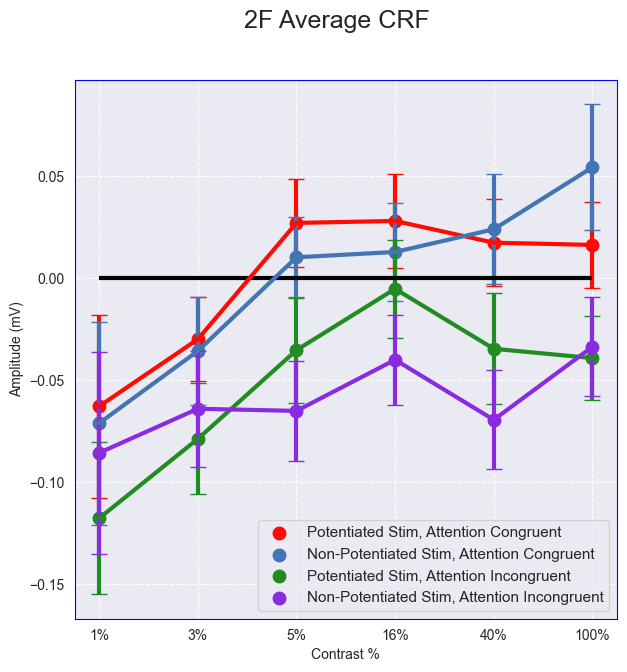

In [43]:
custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)
dsi = int(len(dataSet_Inds))
diffs_dataSet = np.zeros((4,dsi,6))
# harmo  = 0
harmoincC = ['2F','4F','6F','8F']

fig,axs = plt.subplots(figsize = (7,7), squeeze=True)
plt.suptitle(f'{harmoincC[harmo]} Average CRF', fontsize = 18)
#axs.set_ylim([-0.150,0.150])

'find srqt of subject size'
sqr_root = np.sqrt(dsi)


for fi_co in range(4):
    for subjIn in range(len(dataSet_Inds)):
        diffs_dataSet[fi_co,subjIn,:] = diffs[subjIn,fi_co][harmo,:]

avgs = np.nanmean(diffs_dataSet,axis = (1))
stds = (np.nanstd(diffs_dataSet,axis = (1))) / sqr_root

for i in range(4):
    # axs.plot(avgs[i,:], linewidth = 4, label = labels[i], color = colors[i])
    axs.scatter(np.arange(0,6,1), avgs[i,:], linewidth = 4, label = labels[i], color = colors[i])
    #if i == 0 or i == 3:
    axs.errorbar(x = np.arange(0,6,1),y = avgs[i,:], yerr = stds[i,:], color = colors[i], capsize=6, linewidth = 3) # fmt = 'o'
    axs.legend(loc = 'lower right', fontsize = 11)
axs.set_ylabel(f'Amplitude (mV)')
axs.set_xlabel(f'Contrast %')
axs.set_xticks(ticks = np.arange(0,6,1),labels = contrast_labs)
axs.hlines(0,xmin = 0 , xmax = 5, color = 'black', linewidth = 3)

# single subject performance for each condition

C:\Users\plimon\AppData\Local\Temp\ipykernel_13588\3971901049.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axs = plt.subplots(figsize = ((7,7)))


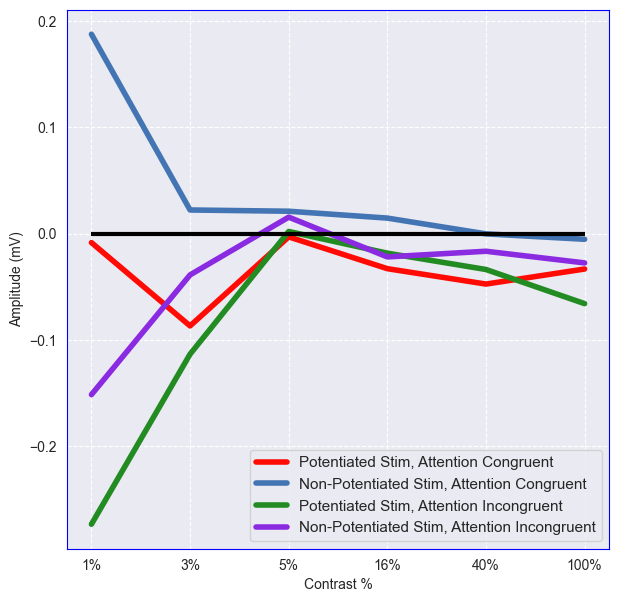

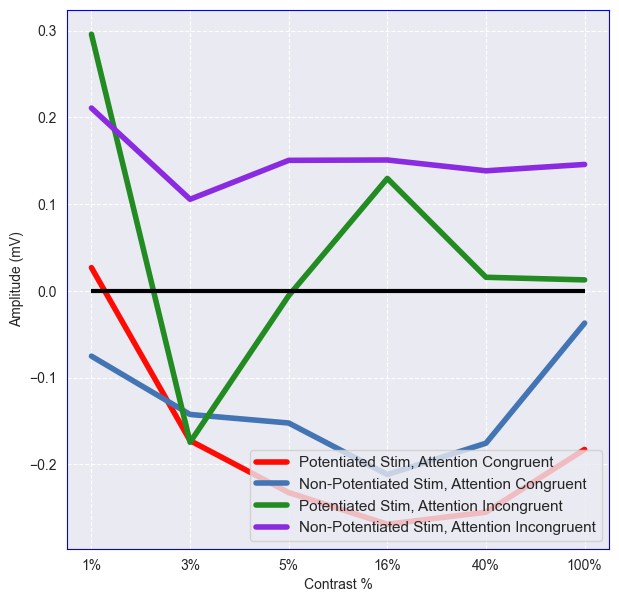

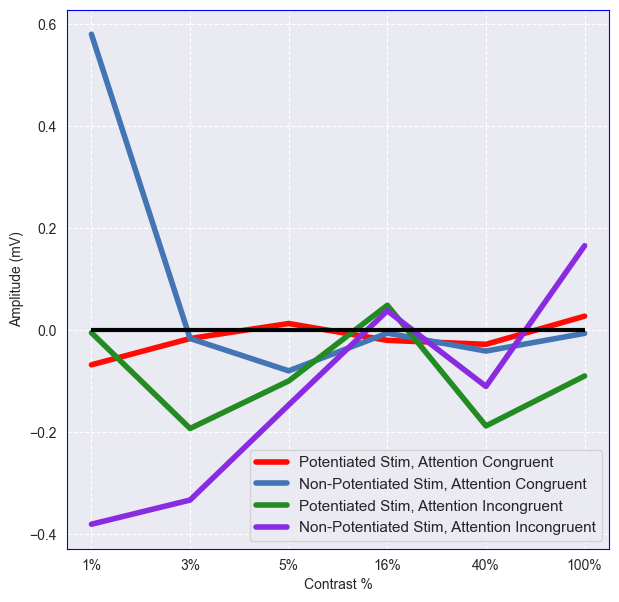

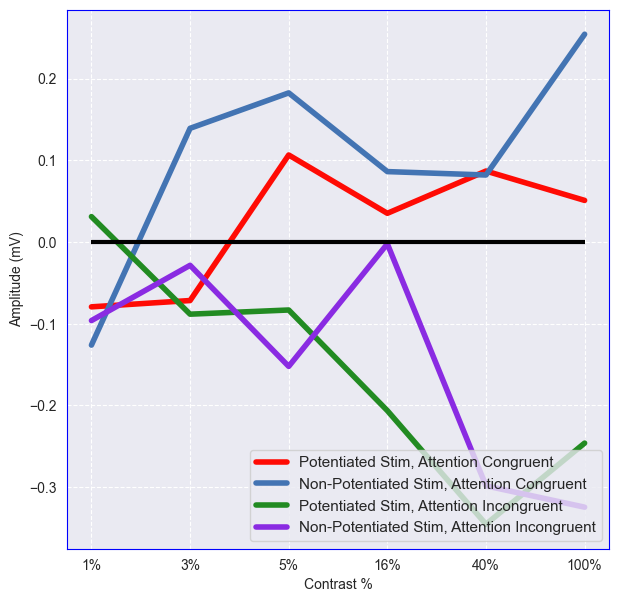

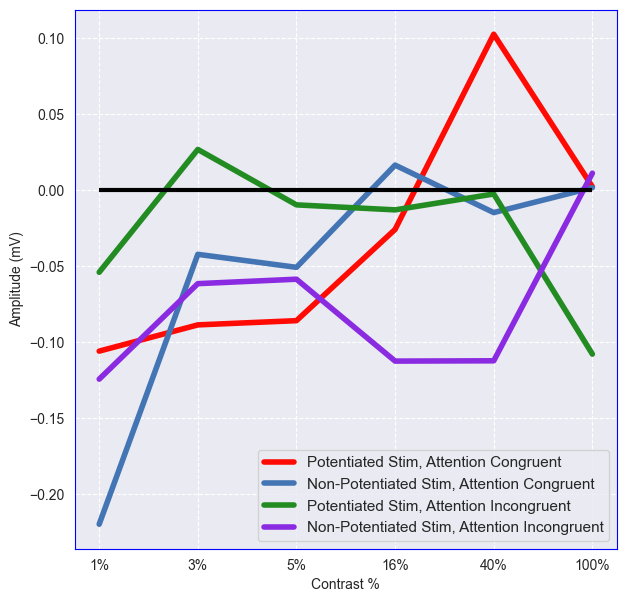

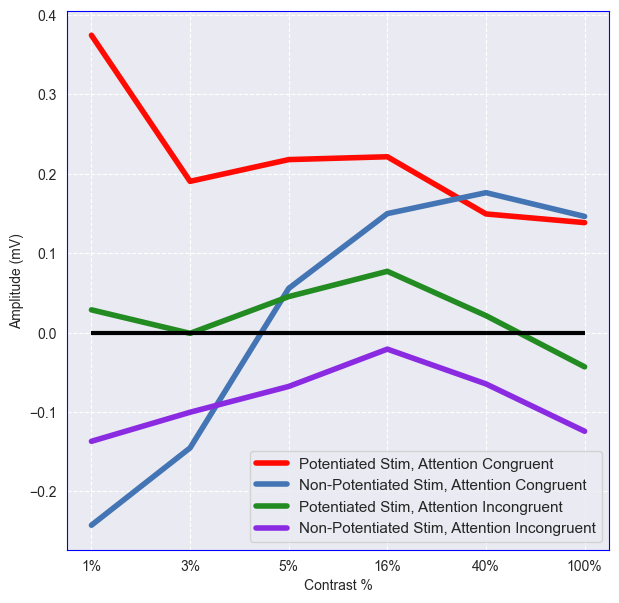

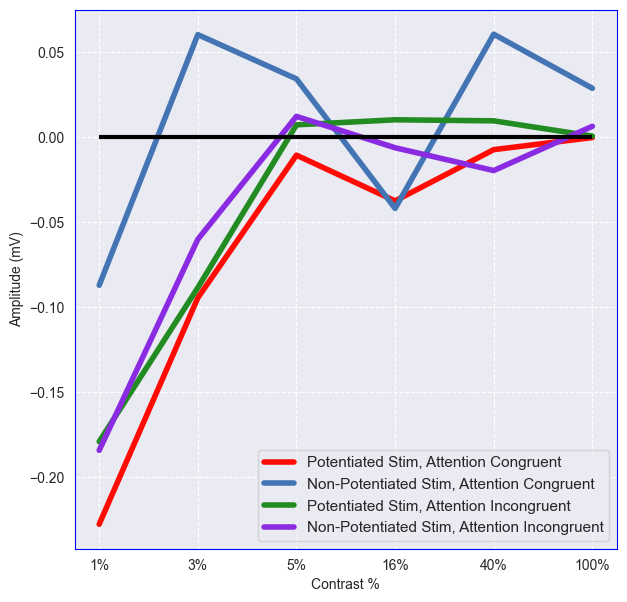

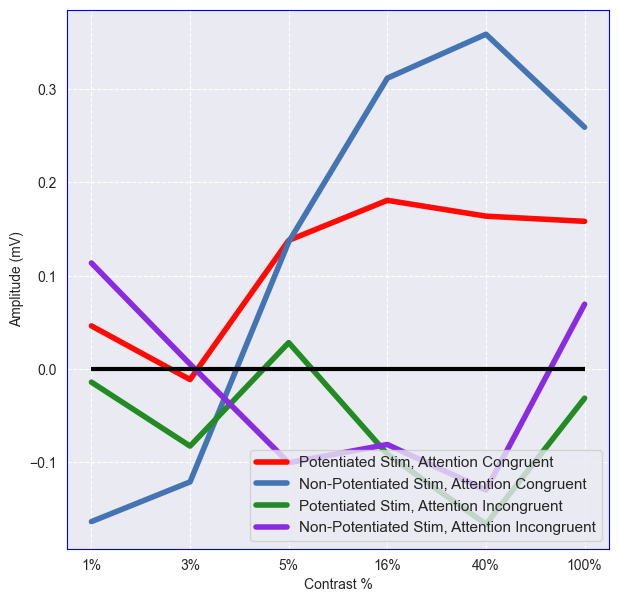

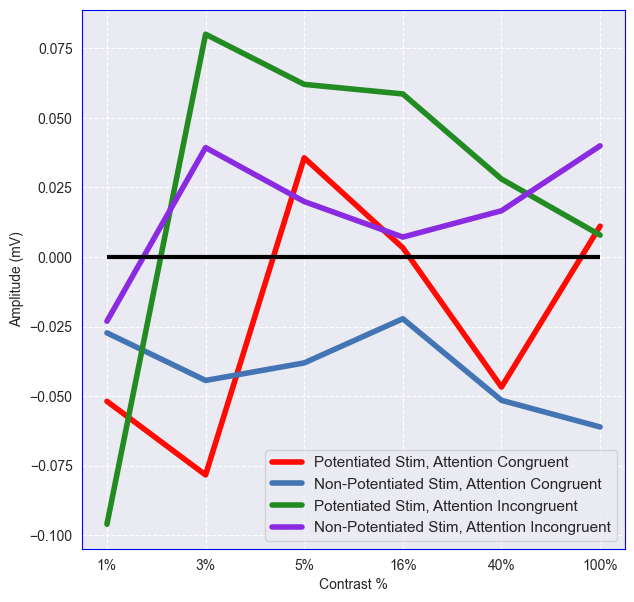

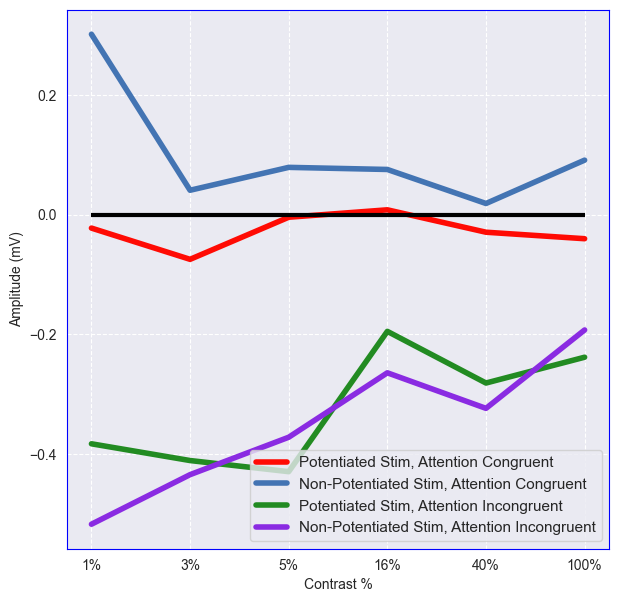

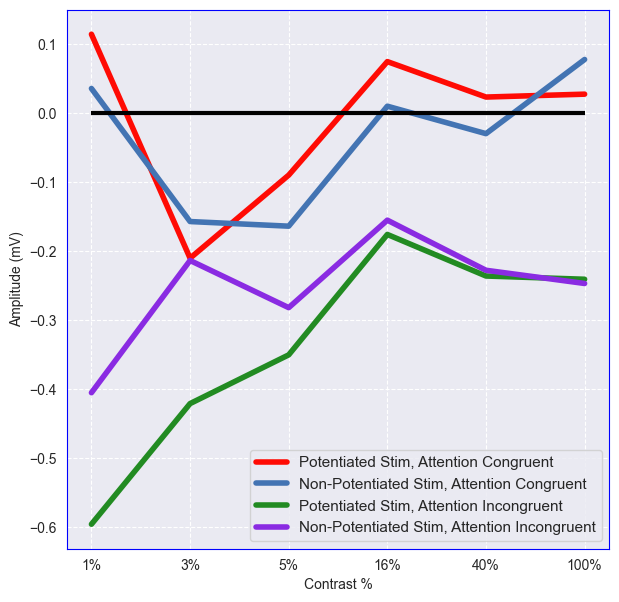

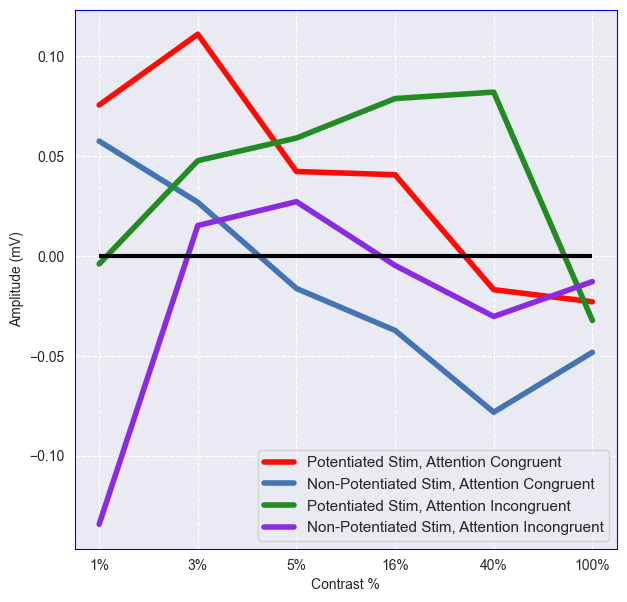

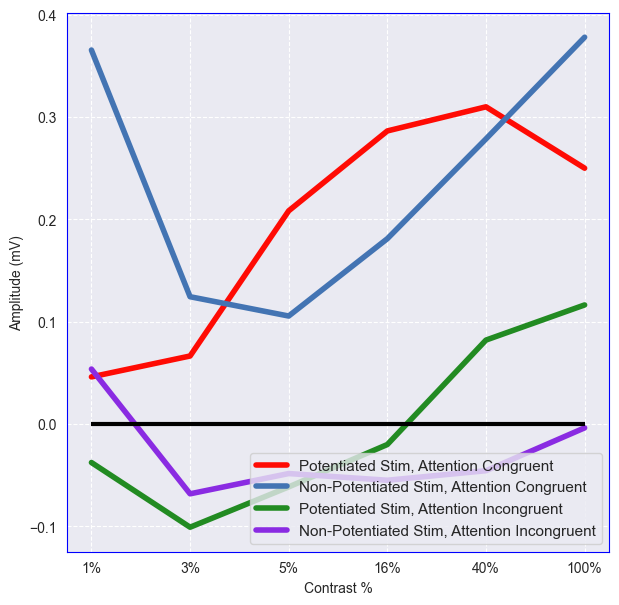

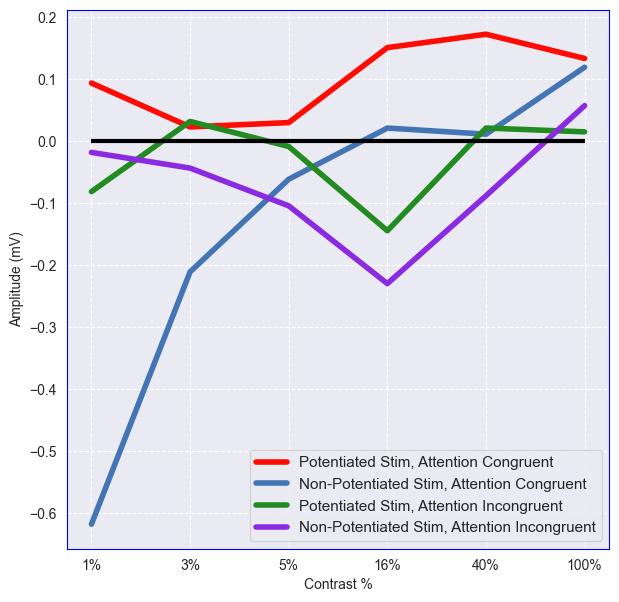

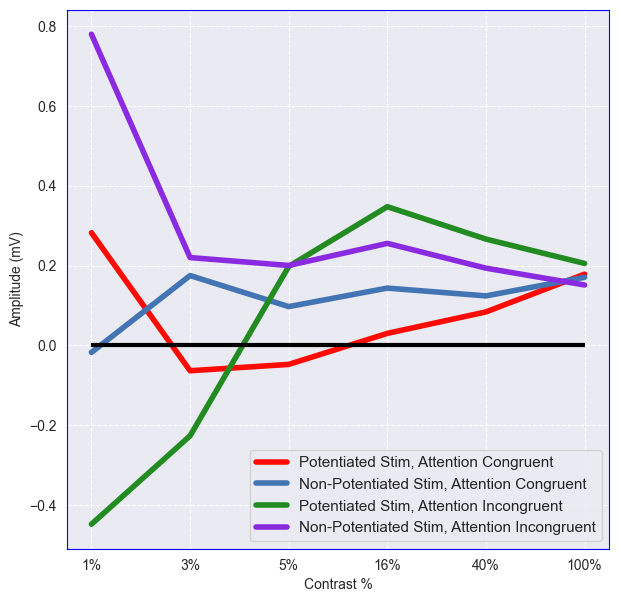

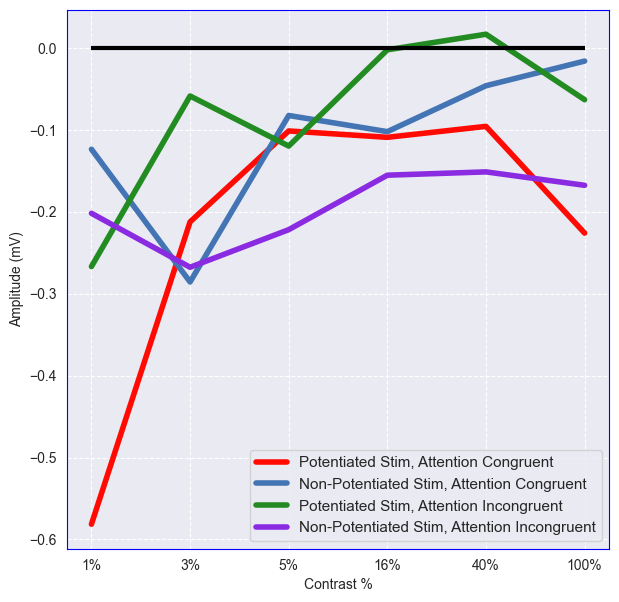

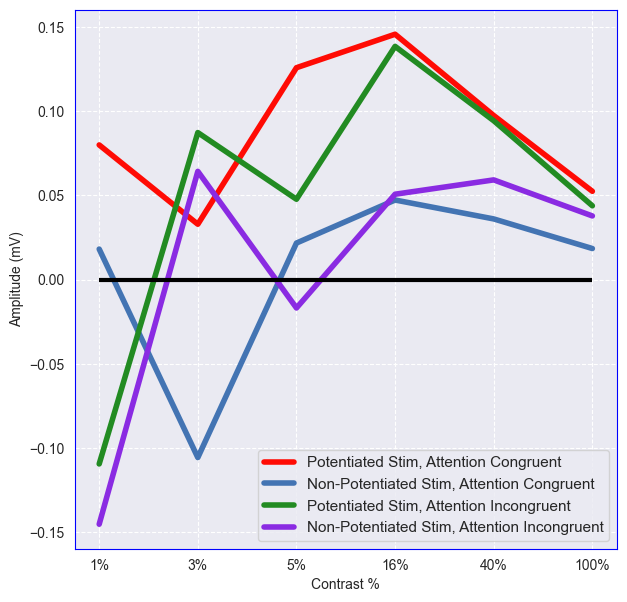

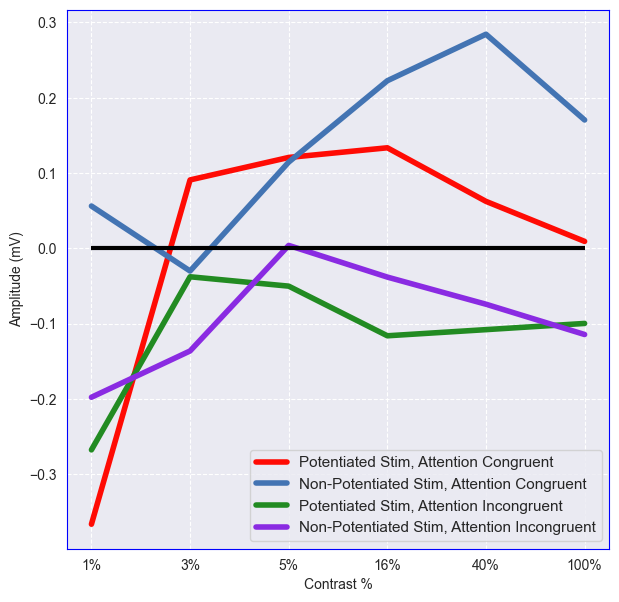

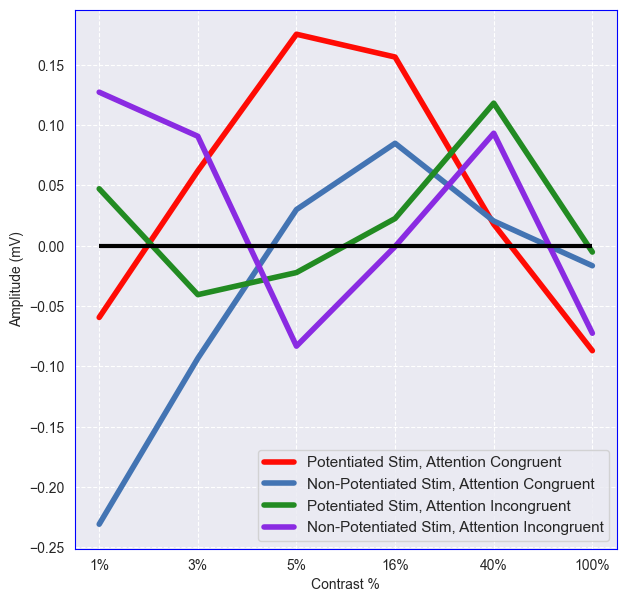

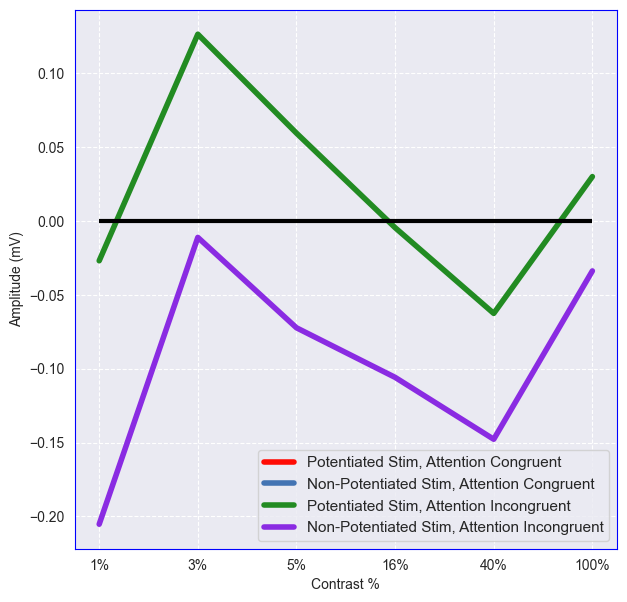

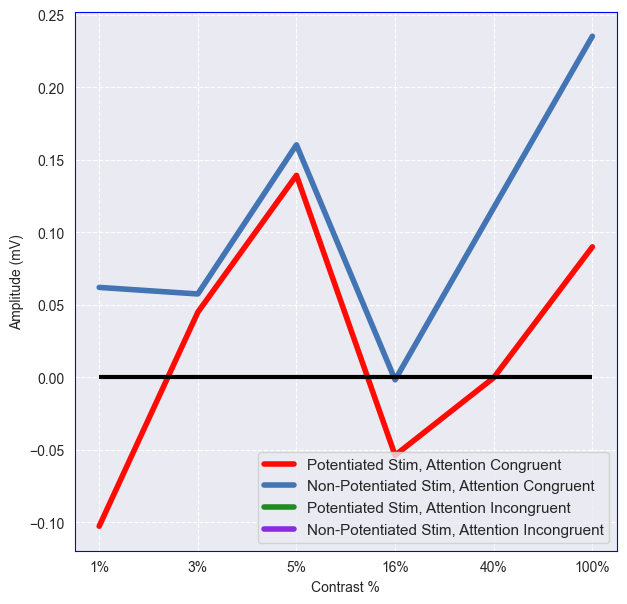

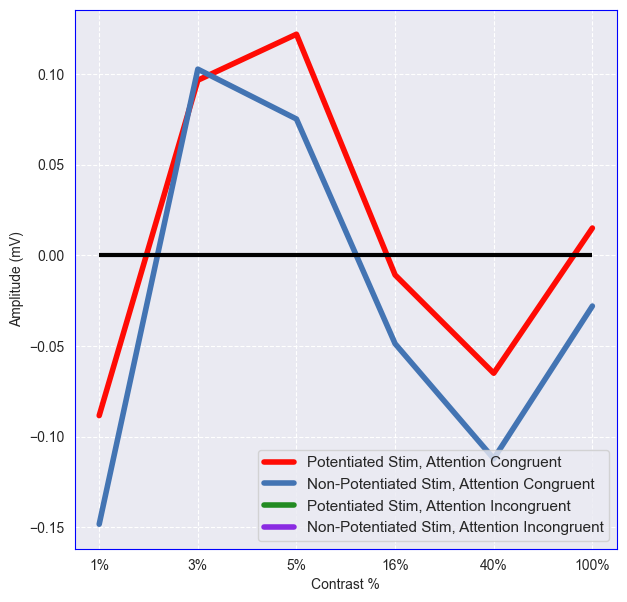

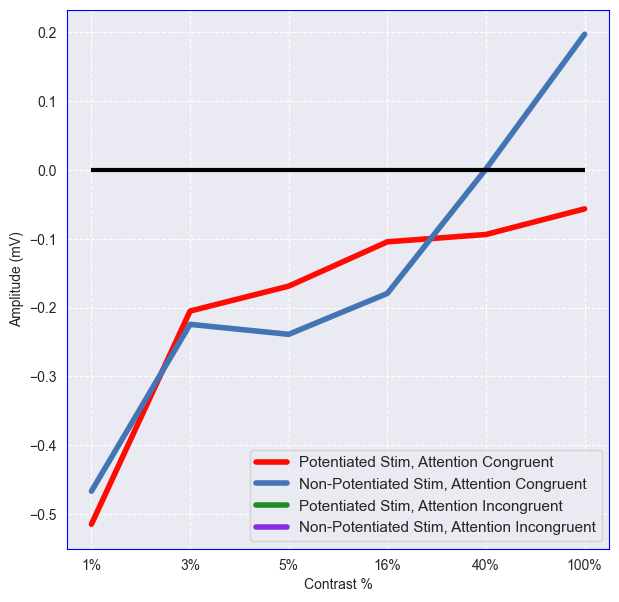

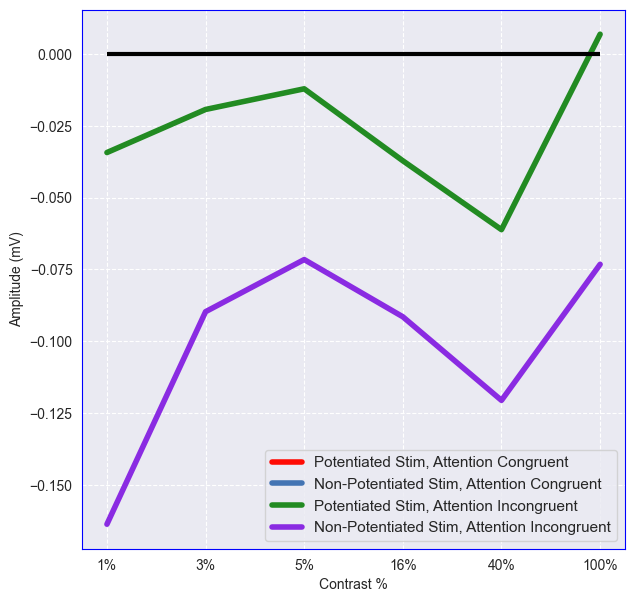

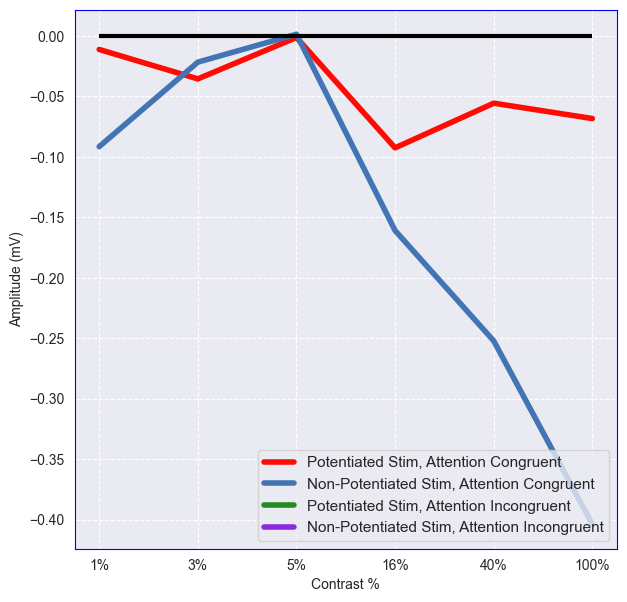

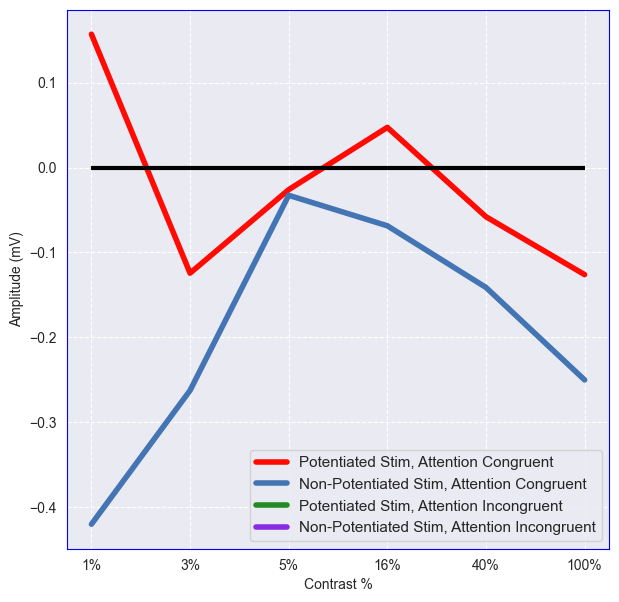

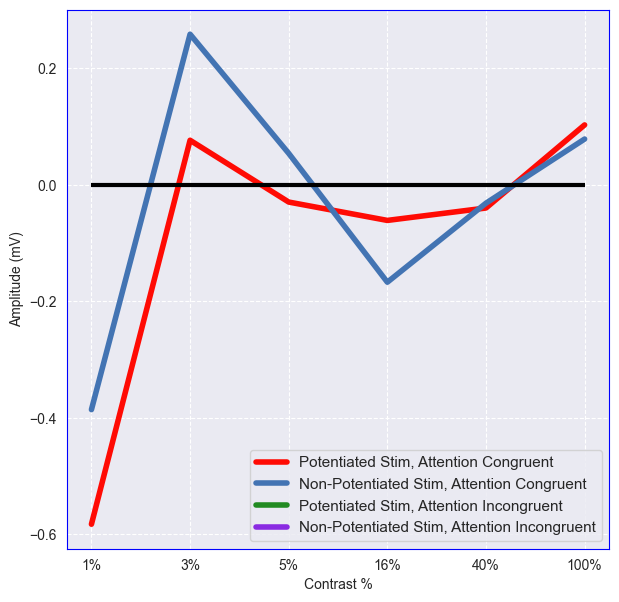

In [35]:
for subjIn in range(len(dataSet_Inds)):
    subj_performance_data = diffs_dataSet[:,subjIn,:]
    fig,axs = plt.subplots(figsize = ((7,7)))
    for i in range(4):
        axs.plot(subj_performance_data[i,:],linewidth = 4, label = labels[i], color = colors[i])
        axs.legend(loc = 'lower right', fontsize = 11)
    axs.set_ylabel(f'Amplitude (mV)')
    axs.set_xlabel(f'Contrast %')
    axs.set_xticks(ticks = np.arange(0,6,1),labels = contrast_labs)
    axs.hlines(0,xmin = 0 , xmax = 5, color = 'black', linewidth = 3)

### Dataframe for ANOVA 

In [36]:
print(len(ProcessedConditionData.keys()))

459


#### End of making data frame for ANOVA

In [37]:
'here is where data will be combined, regardless of Atten-Induction Cong/Incong'
ssrp_Diffs_All_F1 = np.zeros((dsi*2,6)) # get attn Induct Cong data
ssrp_Diffs_All_F2 = np.zeros((dsi*2,6)) # get attn Induct Cong data
# diffs[subject data, conditions 1-4] [harmonic, contrast data]

for sub in range(dsi):
    F1_combs = np.zeros((2,6)) # store F1 data for both sessions
    F2_combs = np.zeros_like(F1_combs) # store F2 data from both sessions 

    'attention induction congruent data flies'
    F1_aic = diffs[sub,0][harmo,:] # F1 induction (ai congruent)
    F2_aicntrl = diffs[sub,1][harmo,:] # F2  (control)
    'attention-induction incongruent data files'
    F1_aiincntrl= diffs[sub,2][harmo,:] # F1 induction (ai-incongruent)
    F2_aiinc = diffs[sub,3][harmo,:]# F2 

    F1_combs[0,:] = F1_aic
    F1_combs[1,:] = F1_aiincntrl

    F2_combs[0,:] = F2_aicntrl
    F2_combs[1,:] = F2_aiinc

    ssrp_Diffs_All_F1[sub:sub+2,:] = F1_combs
    ssrp_Diffs_All_F2[sub:sub+2,:] = F2_combs


In [38]:
print(ssrp_Diffs_All_F1.shape)

f1_m = np.nanmean(ssrp_Diffs_All_F1,axis = 0)
f2_m = np.nanmean(ssrp_Diffs_All_F2,axis = 0)

stds_F1 = (np.nanstd(ssrp_Diffs_All_F1,axis = (0))) / sqr_root
stds_F2 = (np.nanstd(ssrp_Diffs_All_F2,axis = (0))) / sqr_root


(54, 6)


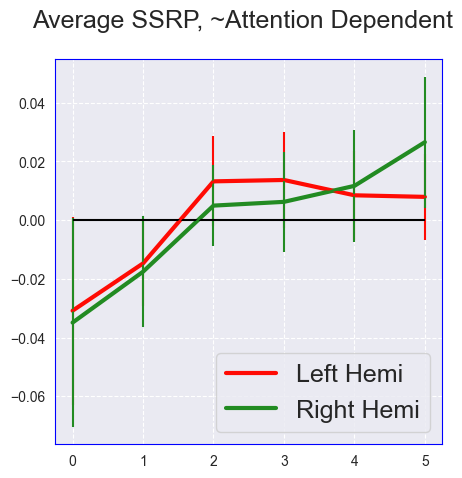

In [39]:
fig,axs = plt.subplots(figsize = (5,5), squeeze=True)
plt.suptitle(f'Average SSRP, ~Attention Dependent', fontsize  = 18)

axs.plot(f1_m, color = colors[0], label = 'Left Hemi', linewidth = 3)
axs.errorbar(x = np.arange(0,6,1),y = f1_m, yerr = stds_F1,  color = colors[0])


axs.plot(f2_m, color = colors[2], label = 'Right Hemi', linewidth = 3)
axs.errorbar(x = np.arange(0,6,1),y = f2_m, yerr = stds_F2, color = colors[2])


axs.hlines(0,xmin = 0,xmax = 5, color = 'black')
axs.legend(loc = 'lower right', fontsize = 18)

In [40]:
# sn = 10
# F1_combs = np.zeros((2,6))
# F2_combs = np.zeros_like(F1_combs)

# 'attention induction congruent data flies'
# F1_aic = diffs[sn,0][harmo,:] # F1 induction (ai congruent)
# F2_aicntrl = diffs[sn,1][harmo,:] # F2  (control)
# 'attention-induction incongruent data files'
# F1_aiincntrl= diffs[sn,2][harmo,:] # F1 induction (ai-incongruent)
# F2_aiinc = diffs[sn,3][harmo,:]# F2 

# F1_combs[0,:] = F1_aic
# F1_combs[1,:] = F1_aiincntrl

# F2_combs[0,:] = F2_aicntrl
# F2_combs[1,:] = F2_aiinc

#### Save Data into .pkl file

In [41]:
# dataOut = {}

# dataOut[0] = SessDataOut
# dataOut[1] = SingleSessDataOut

In [42]:
saveFile = 'n'

if saveFile == 'y':
 with open(NewFileNPath, 'wb') as file:
    pkl.dump(dataOut, file, protocol=pkl.HIGHEST_PROTOCOL)
    print('Sorted Data Saved! :))')
else:
    print('Did Not Save File! Change file name before switching to y!')

Did Not Save File! Change file name before switching to y!
